# **Computer Vision Project #01**
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

# **Identification**

* **Name:** Bernardo de Almeida Soeiro
* **Student Number:**up202008204

* **Name:**Rodrigo de Vasconcelos e Miguel
* **Student Number:**up202008406


In [ ]:
!pip install py7zr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import py7zr
import os

# Substitua pelo caminho correto do seu arquivo .7z no Google Drive
seven_zip_file_path = '/content/drive/MyDrive/VCOMP/CV_Assignment (6).7z'

# Local onde você quer extrair o conteúdo
extract_to = '/content'

# Descompactar o arquivo .7z
with py7zr.SevenZipFile(seven_zip_file_path, mode='r') as archive:
    archive.extractall(path=extract_to)

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display since cv2.imshow crashes the Colab
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import time

Number of Contours found = 6


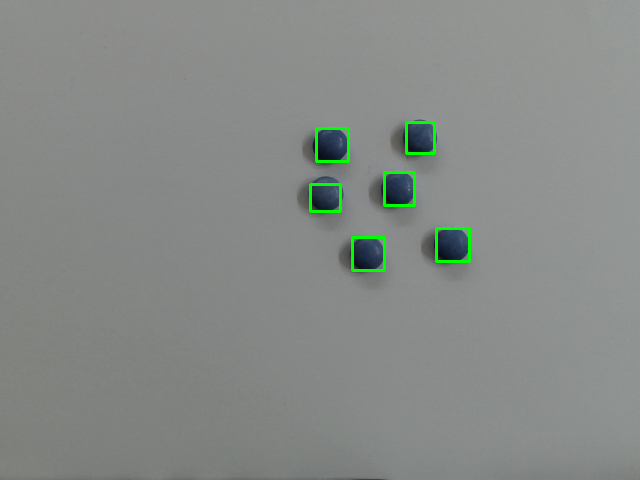



Number of Contours found = 6


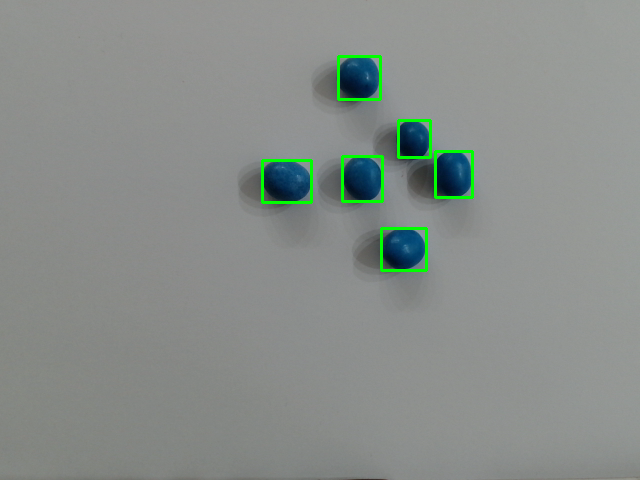



Number of Contours found = 6


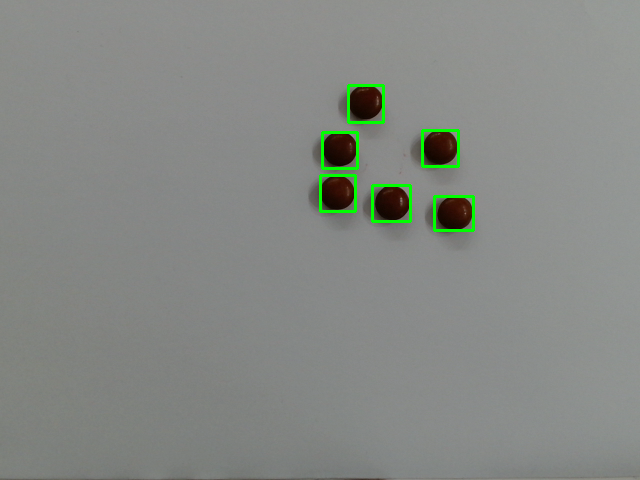



Number of Contours found = 9


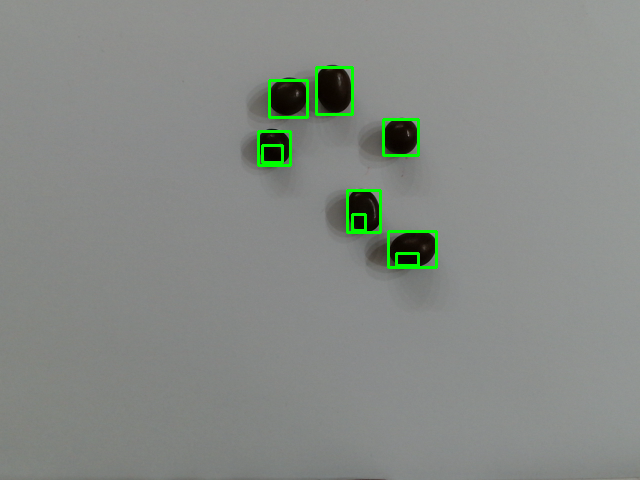



Number of Contours found = 6


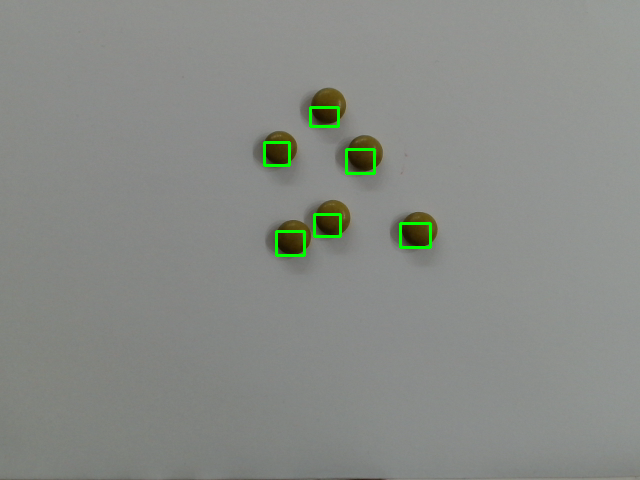



Number of Contours found = 9


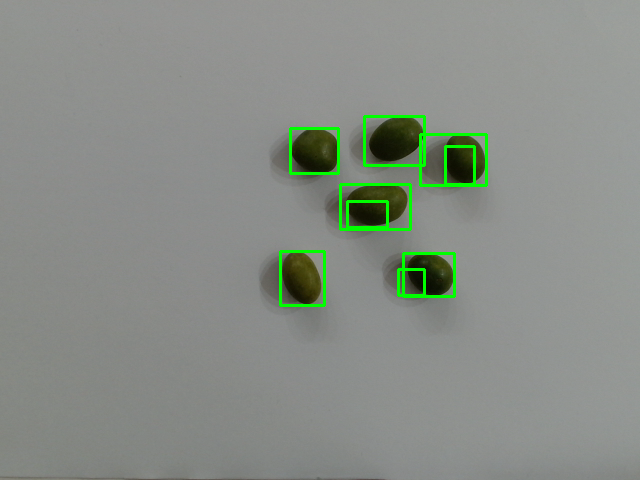



Number of Contours found = 9


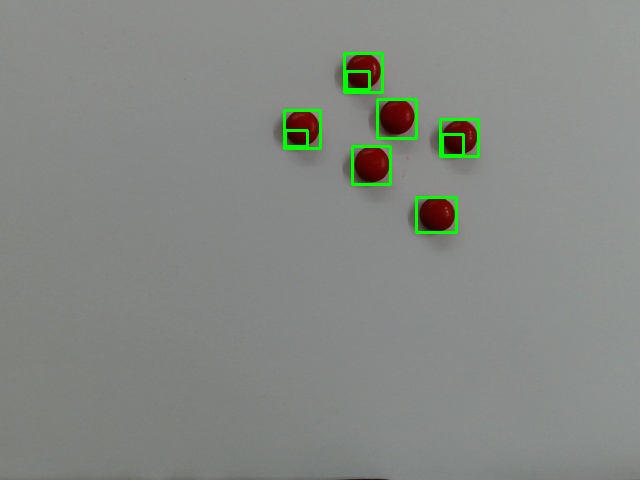



Number of Contours found = 10


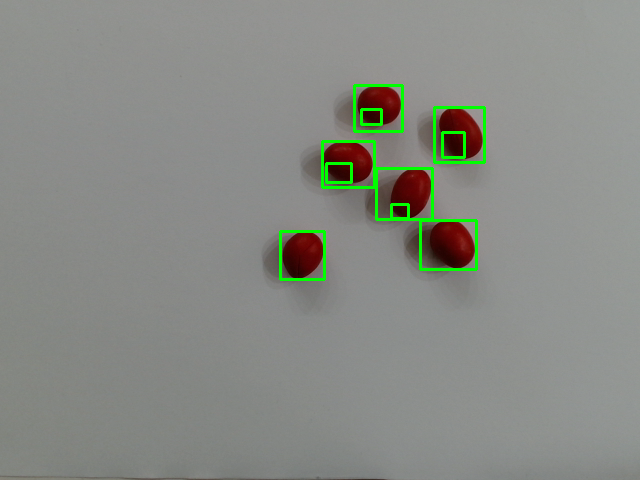



Number of Contours found = 6


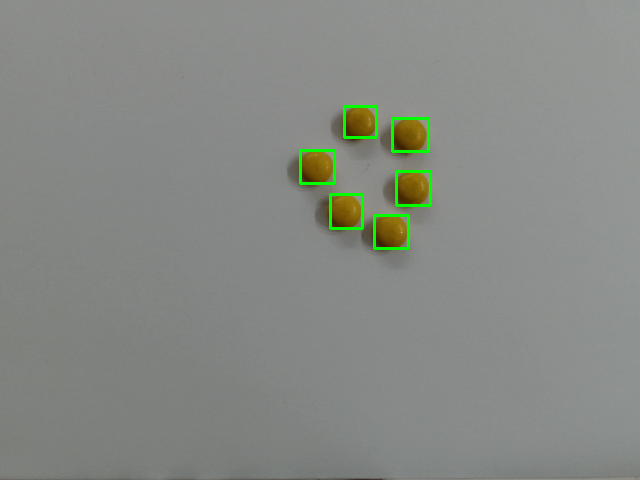



Number of Contours found = 6


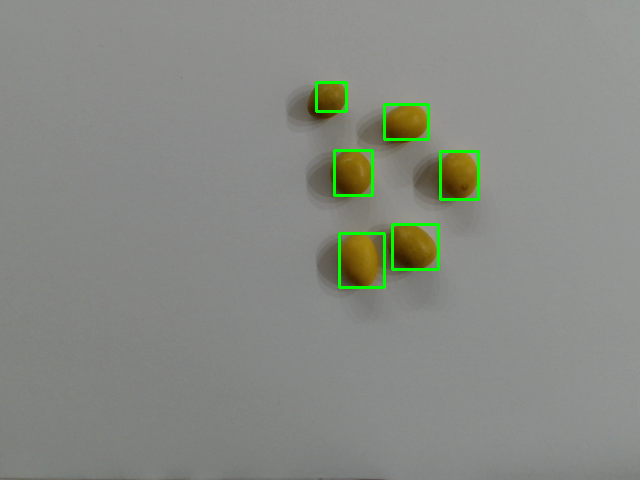

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


def show_roi(image):
  image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Define the HSV range for blue M&Ms
  light_blue = (100, 100, 50)  #AZUL TA BOM
  dark_blue = (140, 255, 255)
  light_brown = (0, 50, 10) #CASTANHO TA
  dark_brown = (20, 255, 100)
  light_green = (25, 30, 30)
  dark_green = (57, 250, 200)
  light_red = (0, 50, 50) #VERMELHO TA BOM
  dark_red = (10, 255, 255)
  light_yellow = (20, 100, 100)  #AMARELO TA BOM
  dark_yellow = (30, 255, 255)


  # Create a mask using the inRange function
  mask_blue = cv2.inRange(image_hsv, light_blue, dark_blue)
  mask_brown = cv2.inRange(image_hsv, light_brown, dark_brown)
  mask_green = cv2.inRange(image_hsv, light_green, dark_green)
  mask_red = cv2.inRange(image_hsv, light_red, dark_red)
  mask_yellow = cv2.inRange(image_hsv, light_yellow, dark_yellow)


  # Supondo que você tenha suas máscaras armazenadas em variáveis como mask_blue, mask_brown, etc.
  masks = [mask_blue, mask_brown, mask_green, mask_red, mask_yellow]

  # Calcula a quantidade de pixels diferentes de zero em cada máscara
  pixel_counts = [np.count_nonzero(mask) for mask in masks]

  # Encontra o índice da máscara com a maior quantidade de pixels
  max_mask_index = np.argmax(pixel_counts)

  # Obtenha a máscara com a maior quantidade de pixels
  max_mask = masks[max_mask_index]



  # Apply the mask to the original image
  result = cv2.bitwise_and(image, image, mask=max_mask )

  # Find contours
  contours,_=cv2.findContours(max_mask , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  true_contours = 0;

  # Consider only contours with area higher than 20
  for c in contours:
    if (cv2.contourArea(c) < 50):
      continue

    x,y,w,h = cv.boundingRect(c)
    ROI=cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    true_contours += 1
  print("Number of Contours found = " + str(true_contours))

  #show image with centroid
  cv2_imshow(ROI)
  return


isolated = []
# Import image
isolated.append(cv2.imread("./assign1/data/white_isolated/blue.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/blue_nut.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/brown.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/brown_nut.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/green.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/green_nut.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/red.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/red_nut.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/yellow.png"))
isolated.append(cv2.imread("./assign1/data/white_isolated/yellow_nut.png"))

#show_roi(isolated[2])
#show_roi(isolated[3])

for  i in range(len(isolated)):
  show_roi(isolated[i])
  print("\n")


# Convert the image to HSV color space





Number of Contours found = 0


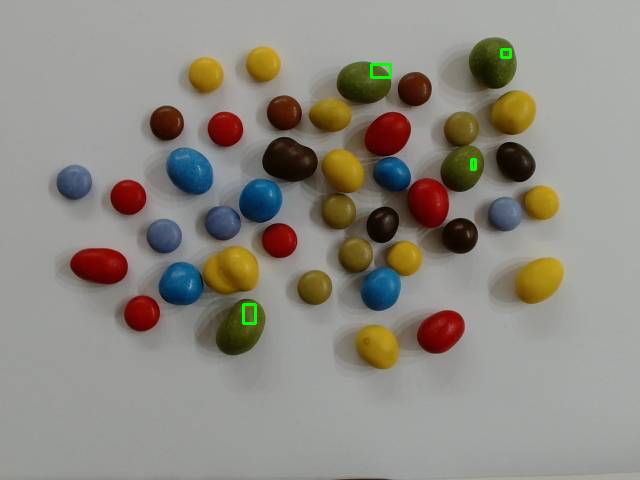

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = cv2.imread("./assign1/data/white_mix/all_rand.png") #Fixed: Removed extra indent

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for blue M&Ms
light_blue = (100, 100, 50)  #AZUL TA BOM
dark_blue = (140, 255, 255)
light_brown = (0, 50, 10)
dark_brown = (20, 255, 100)
light_green = (25, 30, 30)
dark_green = (10, 255, 255)
light_red = (0, 100, 100) #Vermmelho tá
dark_red = (10, 255, 255)
light_yellow = (30, 150, 150)
dark_yellow = (40, 255, 255)


# Create a mask using the inRange function
mask_blue = cv2.inRange(image_hsv, light_blue, dark_blue)
mask_brown = cv2.inRange(image_hsv, light_brown, dark_brown)
mask_green = cv2.inRange(image_hsv, light_green, dark_green)
mask_red = cv2.inRange(image_hsv, light_red, dark_red)
mask_yellow = cv2.inRange(image_hsv, light_yellow, dark_yellow)





# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask_yellow )

# Find contours
contours,_=cv2.findContours(mask_yellow , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

true_contours = 0;

# Consider only contours with area higher than 20
for c in contours:
  if (cv2.contourArea(c) < 10):
    continue

  x,y,w,h = cv2.boundingRect(c)
  ROI=cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
  true_contours += 1
print("Number of Contours found = " + str(true_contours))

#show image with centroid
cv2_imshow(ROI)


